In [14]:
%ls ../../Datasets/from_candice/

time_series_15min_singleindex.csv


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [16]:
file_path = '../../Datasets/from_candice/time_series_15min_singleindex.csv'

In [17]:
df = pd.read_csv(file_path)

In [18]:
df.isnull().sum().sort_values(ascending=False)

HU_solar_generation_actual                    165745
DE_LU_load_forecast_entsoe_transparency       134982
DE_LU_load_actual_entsoe_transparency         131509
DE_LU_solar_generation_actual                 131451
DE_LU_wind_offshore_generation_actual         131422
                                               ...  
DE_50hertz_wind_onshore_generation_actual          6
DE_50hertz_wind_offshore_generation_actual         6
DE_50hertz_wind_generation_actual                  6
cet_cest_timestamp                                 0
utc_timestamp                                      0
Length: 61, dtype: int64

In [19]:
df.shape

(201604, 61)

In [20]:
# select Germany only for better data view
column_sl = df.filter(like='HU')

In [21]:
# let's select Hungary at first
hu_colns = [col for col in df.columns if col in ['utc_timestamp']+column_sl.columns.tolist()]

In [22]:
df_hu = df[hu_colns]

In [23]:
df_hu.head()

,utc_timestamp,HU_load_actual_entsoe_transparency,HU_load_forecast_entsoe_transparency,HU_solar_generation_actual,HU_wind_onshore_generation_actual
0,2014-12-31T23:00:00Z,NaN,NaN,NaN,NaN
1,2014-12-31T23:15:00Z,NaN,NaN,NaN,NaN
2,2014-12-31T23:30:00Z,NaN,NaN,NaN,NaN
3,2014-12-31T23:45:00Z,NaN,NaN,NaN,NaN
4,2015-01-01T00:00:00Z,NaN,NaN,NaN,NaN


In [24]:
df_hu.isnull().sum()

utc_timestamp                                0
HU_load_actual_entsoe_transparency           6
HU_load_forecast_entsoe_transparency       194
HU_solar_generation_actual              165745
HU_wind_onshore_generation_actual         8583
dtype: int64

In [25]:
# format the timestamp
df_hu['utc_timestamp'] = pd.to_datetime(df_hu['utc_timestamp'])
# df_hu['cet_cest_timestamp'] = pd.to_datetime(df_hu['cet_cest_timestamp'])

In [26]:
df_hu.head()

,utc_timestamp,HU_load_actual_entsoe_transparency,HU_load_forecast_entsoe_transparency,HU_solar_generation_actual,HU_wind_onshore_generation_actual
0,2014-12-31 23:00:00+00:00,NaN,NaN,NaN,NaN
1,2014-12-31 23:15:00+00:00,NaN,NaN,NaN,NaN
2,2014-12-31 23:30:00+00:00,NaN,NaN,NaN,NaN
3,2014-12-31 23:45:00+00:00,NaN,NaN,NaN,NaN
4,2015-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN


In [28]:
df_hu.rename(columns={'utc_timestamp':'utc'}, inplace=True)

In [30]:
df_hu['year'] = df_hu.utc.dt.year
df_hu['month'] = df_hu.utc.dt.month
df_hu['day'] = df_hu.utc.dt.day

In [33]:
# take a look at the data now
df_hu.sample(5)

,utc,HU_load_actual_entsoe_transparency,HU_load_forecast_entsoe_transparency,HU_solar_generation_actual,HU_wind_onshore_generation_actual,year,month,day
39693,2016-02-18 10:15:00+00:00,5647.66,5530.37,NaN,46.06,2016,2,18
153582,2019-05-19 18:30:00+00:00,4858.83,4770.14,NaN,14.71,2019,5,19
89589,2017-07-22 04:15:00+00:00,4065.62,3859.74,NaN,13.44,2017,7,22
179648,2020-02-15 07:00:00+00:00,5043.93,4963.10,187.43,23.71,2020,2,15
77182,2017-03-14 22:30:00+00:00,4611.66,4356.72,NaN,105.00,2017,3,14


In [34]:
# drop the na
df_hu_cl = df_hu.dropna(axis=0)

In [35]:
df_hu_cl.isnull().sum()

utc                                     0
HU_load_actual_entsoe_transparency      0
HU_load_forecast_entsoe_transparency    0
HU_solar_generation_actual              0
HU_wind_onshore_generation_actual       0
year                                    0
month                                   0
day                                     0
dtype: int64

In [39]:
# group the data find the daily average
df_hu_Davg = pd.DataFrame(df_hu_cl.groupby(by=['year','month','day']).mean())

In [45]:
df_hu_Davg = df_hu_Davg.reset_index()

In [48]:
df_hu_Davg.drop(columns='utc',inplace=True)

In [51]:
df_hu_Davg.sort_values(by=['year','month','day'],inplace=True)

In [52]:
df_hu_Davg.sample(15)

,year,month,day,HU_load_actual_entsoe_transparency,HU_load_forecast_entsoe_transparency,HU_solar_generation_actual,HU_wind_onshore_generation_actual
162,2020,3,3,5443.331667,5377.903854,46.019688,120.875729
335,2020,8,23,3960.763958,3870.930313,229.090312,76.817188
350,2020,9,7,4784.802917,4376.682292,268.929375,107.391771
173,2020,3,14,4771.922812,4779.969271,219.741667,102.472917
12,2019,10,5,4630.265938,4291.139896,76.037083,161.620729
43,2019,11,5,5353.278750,5165.393437,51.741979,40.617292
33,2019,10,26,4547.082500,4420.777500,141.480208,28.962812
346,2020,9,3,4714.163542,4435.379063,242.023854,13.868333
357,2020,9,14,4884.174479,4605.015625,299.658958,5.386250
2,2019,9,25,4945.151081,4713.277703,33.244865,27.195405


In [53]:
df_hu_Davg['HU_all_actual'] = df_hu_Davg.HU_load_actual_entsoe_transparency+df_hu_Davg.HU_solar_generation_actual+df_hu_Davg.HU_wind_onshore_generation_actual

In [54]:
df_hu_Davg['HU_diff'] = df_hu_Davg.HU_load_forecast_entsoe_transparency - df_hu_Davg.HU_all_actual

<Axes: >

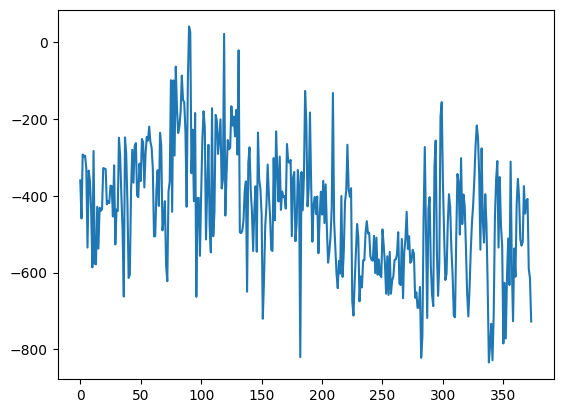

In [55]:
df_hu_Davg.HU_diff.plot()